#0. Carga de datos

In [ ]:
# Importamos las librerías habituales
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import matplotlib
import matplotlib.pylab as plt
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---


##Cómo levantar el df limpio

In [ ]:
directory = '/content/drive/My Drive/DatosTP/limp'
df = pd.read_pickle('/content/drive/My Drive/DatosTP/limp1.pickle')

In [ ]:
for i in range(2,14):
  path = directory + str(i) + '.pickle'
  df1 = pd.read_pickle(path)
  df = df.append(df1)
dfRank = df
df.columns


Index(['cohesion', 'intent', 'lucidity', 'raicesl', 'rating', 'technique',
       'url', 'user', 'dream', 'additional_comments', 'themes', 'settings',
       'characters', 'emotions', 'activities'],
      dtype='object')

In [ ]:
df["raices"] = df["raicesl"]
df["text"] = df["dream"]

#Junta y arma un solo "texto" con las raíces
df['raices_unidas'] = df['raices'].apply(" ".join)

Es casi igual que antes, solo que con 13 archivos limp#.pickle  
También cambiaron las columnas:  
['cohesion', 'intent', 'lucidity', 'raicesl', 'rating', 'technique',
       'url', 'user', 'dream', 'additional_comments', 'themes', 'settings',
       'characters', 'emotions', 'activities']

---



#1. Limpieza previa

In [ ]:
#Hay algunos repetidos...
print(df["raices"][35427])
print(df["raices"][35428])
print(df["url"][35427])

['hello', 'welcome', 'to', 'the', 'bieber', 'dream', 'i', 'm', 'no', 'hater', 'or', 'lover', 'so', 'i', 'be', 'in', 'this', 'strange', 'house', 'i', 'don', 't', 'know', 'of', 'and', 'a', 'a', 'concert', 'go', 'on', 'and', 'all', 'these', 'hobo', 'star', 'at', 'me', 'like', 'i', 'm', 'a', 'ball', 'of', 'cheese', 'wait', 'any', 'self', 'concious', 'in', 'this', 'one', 'then', 'he', 'walk', 'out', 'gasp', 'lover', 'faint', 'and', 'hater', 'shoot', 'him', 'in', 'the', 'head', 'jk', 'actually', 'he', 'be', 'quite', 'old', 'and', 'less', 'wimpy', 'look', 'and', 'amazingly', 'he', 'doesn', 't', 'have', 'that', 'kid', 'voice', 'and', 'hair', 'flip', 'thing', 'go', 'on', 'yeah', 'i', 'hate', 'to', 'admit', 'it', 'but', 'he', 'be', 'cute', 'so', 'i', 'felt', 'a', 'if', 'it', 'be', 'real', 'so', 'i', 'take', 'it', 'slow', 'i', 'be', 'just', 'talk', 'or', 'flirt', 'with', 'him', 'and', 'he', 'let', 'me', 'in', 'his', 'limo', 'and', 'jeesh', 'this', 'quite', 'embarassing', 'because', 'i', 'm', 'not

In [ ]:
df

,cohesion,intent,lucidity,raicesl,rating,technique,url,user,dream,additional_comments,themes,settings,characters,emotions,activities,raices,text,raices_unidas
0,2.0,-1,-1.00,"[i, be, on, the, ground, floor, of, a, dorm, b...",3.0,-1,http://www.dreamjournal.net/journal/dream/drea...,haux,i was on the ground floor of a dorm building ...,,friendly,town city indoors distorted unfamiliar,friend colleague,emotionless,physical thinking visual location change,"[i, be, on, the, ground, floor, of, a, dorm, b...",i was on the ground floor of a dorm building ...,i be on the ground floor of a dorm building th...
1,4.0,-1,-1.00,"[i, be, leave, a, job, after, a, shift, have, ...",2.0,-1,http://www.dreamjournal.net/journal/dream/drea...,haux,i was leaving a job after a shift had ended i...,,failure friendly,indoors distorted familiar ambiguous,colleague unfamiliar,emotionless,thinking visual movement location change,"[i, be, leave, a, job, after, a, shift, have, ...",i was leaving a job after a shift had ended i...,i be leave a job after a shift have end it be ...
2,3.0,-1,-1.00,"[twilight, my, present, home, i, be, leave, th...",3.0,-1,http://www.dreamjournal.net/journal/dream/drea...,PearlDiver,twilight my present home i am leaving the hou...,curious dream bl is one of the worst people i ...,music action success failure health friendly,outdoors indoors distorted familiar unfamiliar...,other relative s friend stranger unfamiliar,worry relaxed peaceful,auditory physical thinking visual movement pro...,"[twilight, my, present, home, i, be, leave, th...",twilight my present home i am leaving the hou...,twilight my present home i be leave the house ...
3,5.0,-1,-1.00,"[when, your, favourite, song, be, announce, in...",2.0,-1,http://www.dreamjournal.net/journal/dream/drea...,LucidDreamer777,when your favourite song is announced in your...,p s the last song that i played before going t...,music fun,school outdoors,colleague teacher,fear dread happiness shock,auditory thinking visual movement expressive c...,"[when, your, favourite, song, be, announce, in...",when your favourite song is announced in your...,when your favourite song be announce in your d...
4,4.0,red,1.25,"[serve, customer, be, in, a, mall, style, like...",2.0,-1,http://www.dreamjournal.net/journal/dream/drea...,LucidDreamer777,serving customers being in a mall styled like...,morning,nightmare,mall outdoors indoors,child other relative s stranger,sadness worry fear dread emotionless,auditory physical thinking visual movement sea...,"[serve, customer, be, in, a, mall, style, like...",serving customers being in a mall styled like...,serve customer be in a mall style like an anci...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123718,5.0,-1,-1.00,"[first, off, ali, do, not, have, the, father, ...",-1.0,-1,http://www.dreamjournal.net/journal/dream/drea...,MtDewWolf,first off ali did not have the father she doe...,omg if this is precognitive i m killing someone,,school,other relative s friend,sadness fear dread anxiety,,"[first, off, ali, do, not, have, the, father, ...",first off ali did not have the father she doe...,first off ali do not have the father she do no...
123719,4.0,-1,-1.00,"[ali, ben, dan, and, i, be, all, in, the, clas...",-1.0,-1,http://www.dreamjournal.net/journal/dream/drea...,MtDewWolf,ali ben dan and i were all in the classroom a...,,,school,friend,confusion,searching,"[ali, ben, dan, and, i, be, all, in, the, clas...",ali ben dan and i were all in the classroom a...,ali ben dan and i be all in the classroom acro...
123720,3.0,-1,-1.00,"[i, be, in, some, sort, of, a, strange, arena,...",-1.0,-1,http://www.dreamjournal.net/journal/dream/drea...,Elemental_angel,i was in some sort of a strange arena facing ...,do not know where this came from,violence,,friend animals,confusion,searching,"[i, be, in, some, sort, of, a, strange, arena,...",i was in some sort of a strange arena facing ...,i be in some sort of a strange arena face a bl...
1237

#Regresor



In [ ]:
dfRank = df.loc[df['rating']>0]
dfPosRank = dfRank.loc[dfRank["rating"]>3] #asumo rank pos == mayor a 3
dfNegRank = dfRank.loc[dfRank["rating"]<3] #asumo rank neg == menor a 3

dfPosRank['rating']=1
dfNegRank['rating']=0


dataPos = dfPosRank[['rating','raices_unidas']]
dataNeg = dfNegRank[['rating','raices_unidas']]

data = dataPos.append(dataNeg)
data.sort_index
data = data[['raices_unidas','rating']]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data

,raices_unidas,rating
11,i be walk down the street with a beautiful act...,1
12,i be a visitor at ashland elementary where i g...,1
29,i dream that it be rain and i be walk along th...,1
30,morning of july tuesday i be in an unfamiliar ...,1
33,morning of april wednesday i be in an unfamlia...,1
...,...,...
123597,i seem to be outside it be kind of like a cros...,0
123598,in one dream there be something about some kin...,0
123599,there be some kind of tv movie on with patrick...,0
123600,this dream may or may not have be relate to sh...,0


In [ ]:
import nltk
nltk.download()
from nltk import word_tokenize

from nltk.corpus import stopwords
stopwords = (stopwords.words('english'))
stopwords += ['get','go','one','like','look','say', 'see', 'back','seen','talk','came','come','may','tell','dream','tumblr', '__']

import string

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.raices_unidas, data.rating, random_state=22)

In [ ]:
def text_cleaning(a):
  remove_punctuation = [char for char in a if char not in string.punctuation]
  remove_punctuation=''.join(remove_punctuation)
  return[word for word in remove_punctuation.split() if word.lower() not in stopwords]

In [ ]:
#print(data.iloc[:,0].apply(text_cleaning))

In [ ]:
#bow_transformer = CountVectorizer(analyzer = text_cleaning).fit(data['text'])

###bow_transformer = CountVectorizer(analyzer = text_cleaning).fit(x_train)

vect = CountVectorizer(analyzer = text_cleaning)

X_train = vect.fit_transform(x_train)

X_test = vect.transform(x_test)

#tengo mis dudas
###bow_transformer1 = CountVectorizer(analyzer = text_cleaning).fit(x_train)


In [ ]:
#title_bow = bow_transformer.transform(data['text'])

####title_bow = bow_transformer.transform(x_train)


#tengo mis dudas
####X_test = bow_transformer1.transform(x_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

#tfidf_transformer = TfidfTransformer().fit(title_bow)

#title_tfidf = tfidf_transformer.transform(title_bow)


#pepe_transformer = TfidfTransformer().fit(X_test)
#title_pepe = pepe_transformer.transform(X_test)



XX_train = TfidfTransformer().fit_transform(X_train)
XX_test = TfidfTransformer().fit_transform(X_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

#model = MultinomialNB().fit(title_tfidf,data['rating'])

mnb = MultinomialNB()

mnb.fit(XX_train,y_train)

MultinomialNB()

In [ ]:
#all_predictions = model.predict(title_tfidf)

result = mnb.predict(XX_test)

In [ ]:
#Accuracy
print(accuracy_score(result,y_test))

0.657971909245254


In [ ]:
from sklearn.metrics import roc_auc_score

y_hat_test = mnb.predict_proba(XX_test)[:, 1]
y_hat_train = mnb.predict_proba(XX_train)[:, 1]

# evaluo el AUC
roc_test = roc_auc_score(y_test, y_hat_test)
roc_train = roc_auc_score(y_train, y_hat_train)
roc_test, roc_train

(0.6616759353533538, 0.805268636694819)

In [ ]:
from sklearn.metrics import confusion_matrix

#confusion_matrix(data['rating'],all_predictions)

cm =confusion_matrix(y_test, result)
probas = mnb.predict_proba(XX_test)

In [ ]:
def TPR_FPR(cm): # computa la tasa de verdaderos y falsos positivos a partir de la matriz de confusion
  TPR = cm[1,1]/(cm[1,1]+cm[0,1])
  FPR = cm[1,0]/(cm[1,0]+cm[0,0])
  return [TPR,FPR] # devuelve una lista donde el primer elemento es la tasa de verdaderos positivos y el segundo la tasa de falsos negativos

T = 0.5 # definimos el umbral
ypred = np.zeros(probas.shape[0]) # armamos un vector que tiene todos ceros y tiene la longitud del vector de etiquetas
ypred[probas[:,1]>T] = 1 # donde la probabilidad es mayor que T, ponemos 1
cm = confusion_matrix(ypred, y_test) # metemos en la matriz de confusion
metricas = TPR_FPR(cm)

print('Matriz de confusion del modelo es:')
print(cm)
print('Tasa de verdaderos positivos: {}'.format(round(metricas[0],4)))
print('Tasa de falsos positivos: {}'.format(round(metricas[1],4)))

Matriz de confusion del modelo es:
[[4167 2207]
 [   9   96]]
Tasa de verdaderos positivos: 0.0417
Tasa de falsos positivos: 0.0022


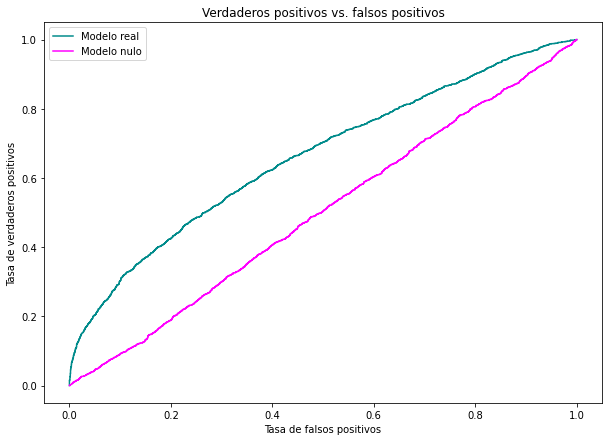

In [ ]:
from sklearn.metrics import roc_curve # función curva ROC de scikit-learn
from sklearn.metrics import roc_auc_score # función AUC de scikit-learn

fpr, tpr, thresholds = roc_curve(y_test, probas[:,1]) # Función ROC: recibe las etiquetas verdaderas y las probas de que sean 1
                                                # Devuelve las tastas de falsos positivos y verdaderos positivos, además de los
                                                # umbrales a los que están calculados
auc = roc_auc_score(y_test, probas[:,1]) # Cálculo del área debajo de la curva, recibe también las etiquetas verdaderas
                                    # y la proba de que valgan 1.

#print('AUC: {}'.format(round(auc,4))) # mostramos el AUC con 4 cifras significativas


from numpy.random import shuffle # para shufflear el vector

y_shuffledt = list(y_train) # creo una copia del vector de targets, porque shuffle lo pisa
shuffle(y_shuffledt) # shuffleo

y_shuffledtst = list(y_test) # creo una copia del vector de targets, porque shuffle lo pisa
shuffle(y_shuffledtst) # shuffleo

logreg2 = MultinomialNB()
logreg2.fit(XX_train, y_shuffledt)
y_pred2 = logreg2.predict(XX_test)

probas2 = logreg2.predict_proba(XX_test)
pr2, tpr2, thresholds2 = roc_curve(y_shuffledtst, probas2[:,1])
auc_test2 = roc_auc_score(y_shuffledtst, probas2[:,1]) #  AUC con datos de evaluación

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# este codigo fue sacado del notebook de ROC AUC (clase 10) y sirve para visualizar la curva ROC

fig, ax = plt.subplots(figsize = (10,7))
ax.set_title('Verdaderos positivos vs. falsos positivos')
ax.plot(fpr,tpr, label='Modelo real', color='darkcyan')
ax.plot(pr2,tpr2, label='Modelo nulo', color = 'magenta')

ax.set_xlabel('Tasa de falsos positivos') # Etiqueta del eje x
ax.set_ylabel('Tasa de verdaderos positivos') # Etiqueta del eje y
plt.legend()